In [1]:
import math
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline

Преобразующая система cx=(1+ap+bp^2)y

In [2]:
a = -2
b = 1
c = 1

Передаточная функция W(s) = c/(1+a*s+b*s^2)

In [3]:
transfer_function = signal.lti([c], [b, a, 1])
transfer_function

TransferFunction(
array([1.]),
array([ 1., -2.,  1.])
)

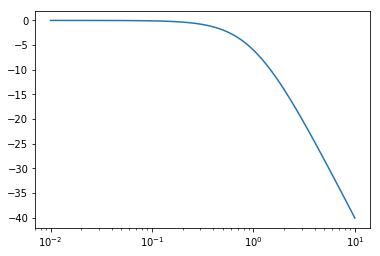

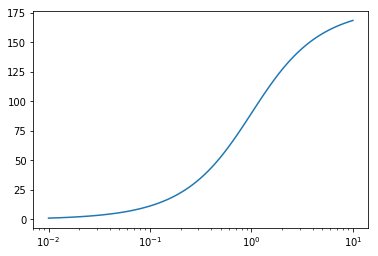

12842.29812571232

In [4]:
W, mag, phase = signal.bode(transfer_function)
plt.figure()
plt.semilogx(W, mag)
plt.figure()
plt.semilogx(W, phase)
plt.show()
10 ** ((1 - mag[-1]) / 10)

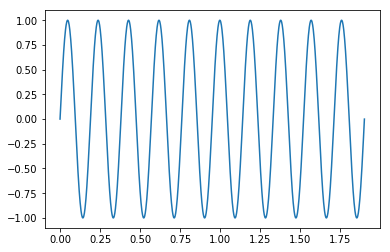

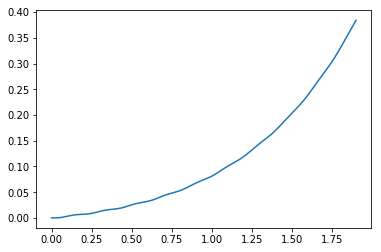

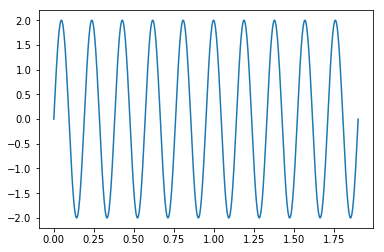

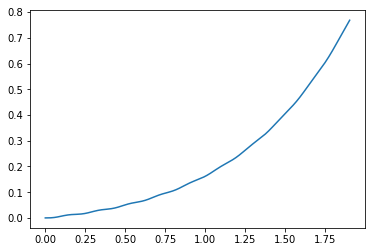

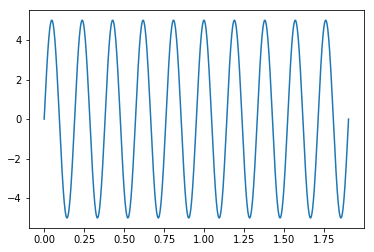

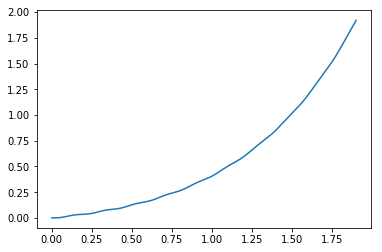

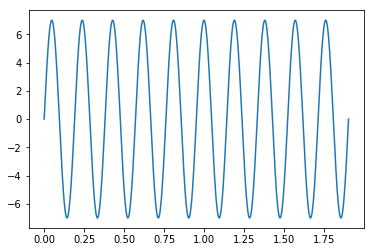

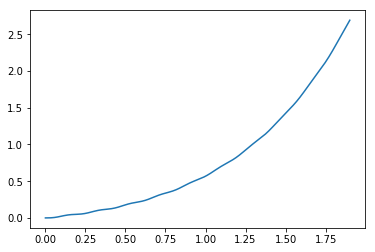

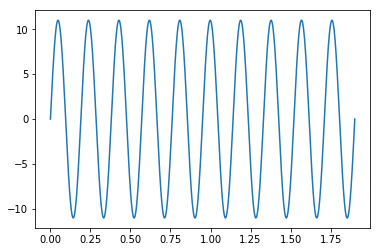

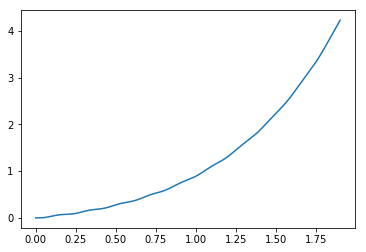

In [5]:
freq = 5.26
T = np.linspace(0, 10.0/freq, 1001)
mags = [1, 2, 5, 7, 11]
for mag in mags:
    S = [mag * math.sin(t*2*math.pi*freq) for t in T]
    Tout, yout, xout = signal.lsim(transfer_function, S, T)
    plt.figure()
    plt.plot(T, S)
    #plt.title('Input signal')
    plt.figure()
    plt.plot(Tout, yout)
    #plt.title('Output signal.')
    plt.show()

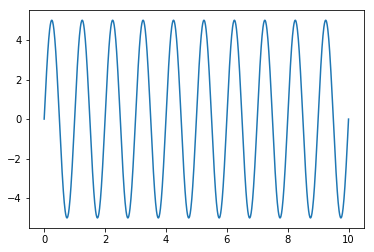

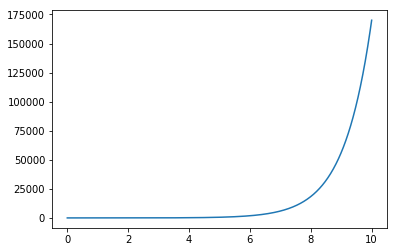

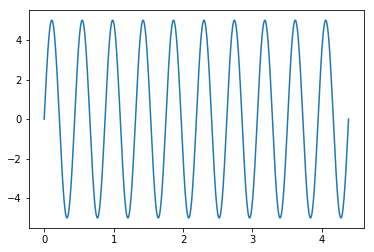

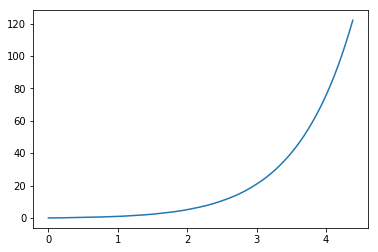

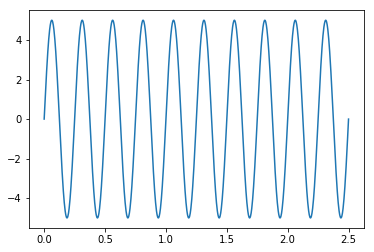

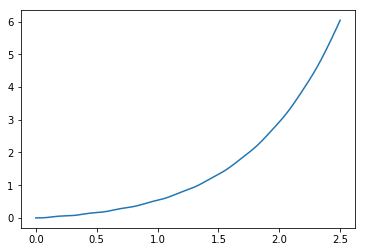

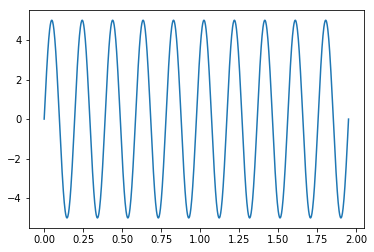

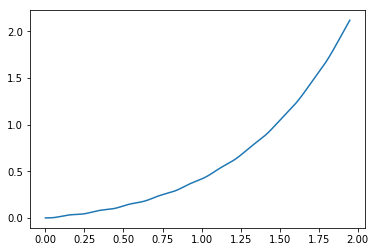

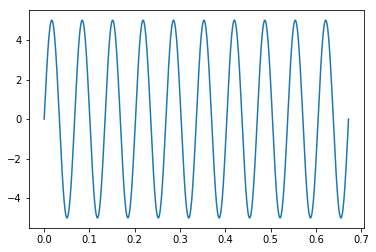

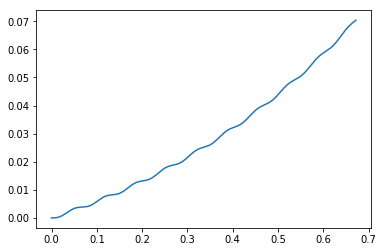

In [6]:
freqs = [1, 2.28, 4, 5.13, 14.88]

magi = 5
for freq in freqs:
    T = np.linspace(0, 10.0/freq, 1001)
    S = [magi * math.sin(t*2*math.pi*freq) for t in T]
    Tout, yout, xout = signal.lsim(transfer_function, S, T)
    plt.figure()
    plt.plot(T, S)
    #plt.title('Input signal.')
    plt.figure()
    plt.plot(Tout, yout)
    #plt.title('Output signal.')
    plt.show()

### A(ω) = |W(jω)|, φ(ω) = arg(W(jω))



In [7]:
def Amp(w):
    return c/np.sqrt(4 * w ** 2 + (1 - w ** 2) ** 2)

def Phi(w):
    Amp(w)
    arg = (c / (-b * (w ** 2) + a * w * 1j + 1))
    #return 1j * ((np.log(Amp(w))) - np.log(arg)) #Вы можете проверить, что этот код также работает
    return (np.arctan((b-w**2)/(a*w))+1/2*np.pi)

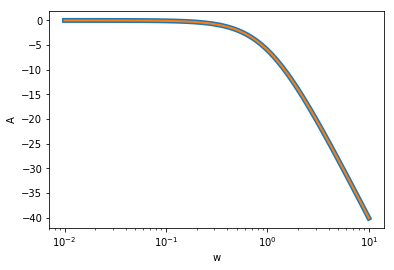

In [8]:
W, mag, phase = signal.bode(transfer_function)
A = [Amp(w) for w in W]
phi = [Phi(w) * 180 / math.pi for w in W]
plt.figure()
plt.title = 'АЧХ'
plt.xlabel('w')
plt.ylabel('A')
plt.semilogx(W, mag, linewidth=5)
plt.semilogx(W, 20 * np.log10(A), linewidth=2)
plt.show()

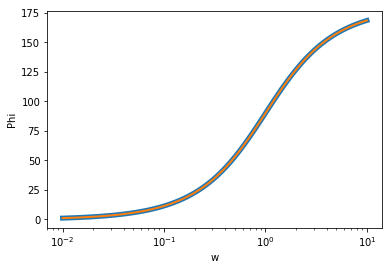

In [9]:
plt.figure()
plt.title = 'ФЧХ'
plt.xlabel('w')
plt.ylabel('Phi')
plt.semilogx(W, phase, linewidth=5)
plt.semilogx(W, phi, linewidth=2)
plt.show()

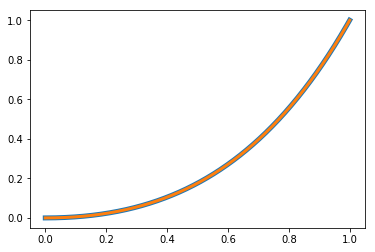

In [10]:
def h(T):
    return np.exp(T) * (-1 + T) + 1

T = np.linspace(0, 1, 1001)
S = np.heaviside(T, 1)

Tout, mag, phase = signal.lsim(transfer_function, S, T)

plt.plot(Tout, mag, linewidth=5)
plt.plot(T, h(T),  linewidth=3)